# Tutorial 2

Tutorial outline and important points

Running the code: 
 full block - press arrow or ctrl+enter or 
 separate lines - highlight and ctrl+shift+enter

To see variables press on {x}. Press on variable name to see its content



1. import Numpy and more examples

2. upload file from PC or drive
3. upload file from site with url


In [2]:
# import packages

import numpy as np # arrays, array operations


In [9]:
# create vector using functions
vec1 = np.arange(0, 20) # (start, stop-1, step=1)
print(vec1)

vec2 = np.arange(0, 20, step=10) # (start, stop-1, step)
print(vec2)

vec3 = np.arange(0, 21, step=10) # (start, stop-1, step)
print(vec3)

vec4 = np.arange(1, 21, step=10) # (start, stop-1, step)
print(vec4)

vec5 = np.linspace(0, 20, 6) # (start, stop, length)
print(vec5)

vec6 = np.linspace(1, 21, 20) # (start, stop, length)
print(vec6)

randvec1, randvec2 = np.random.rand(3), np.random.randint(1, 20, 3)

print(randvec1) # between 0 and 1

print(randvec2) # integers between 10 and 20

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0 10]
[ 0 10 20]
[ 1 11]
[ 0.  4.  8. 12. 16. 20.]
[ 1.          2.05263158  3.10526316  4.15789474  5.21052632  6.26315789
  7.31578947  8.36842105  9.42105263 10.47368421 11.52631579 12.57894737
 13.63157895 14.68421053 15.73684211 16.78947368 17.84210526 18.89473684
 19.94736842 21.        ]
[0.16335836 0.04826793 0.07526369]
[8 8 2]


In [4]:
# del mat1, mat2 # delete separate variables

# loop to delete all variables
for name in dir():
    if not name.startswith('_'):
        del globals()[name]


Simulation of population and sampling


In [1]:
# import packages

import numpy as np # arrays, array operations
import pandas as pd # working with data structures
import scipy.stats as stats
import io # import/output files
from google.colab import files
import matplotlib.pyplot as plt # plot graphs

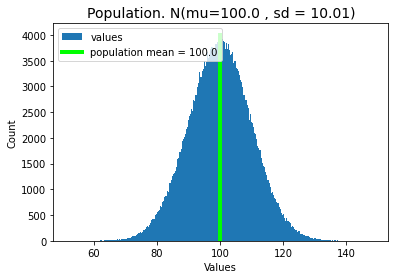

In [86]:
# generate population - normal

population = np.random.normal(100,10,size = (1000000,1))
population_mean = np.mean(population)
population_sd = np.std(population)

plt.hist(population, bins = 1000, label = 'values')
plt.plot([population_mean, population_mean] , [0, 4000], color = 'lime', linewidth = 4,
           label = 'population mean = '+ str(round(population_mean,2)))

plt.title('Population. N(mu='+str(round(population_mean,2))+' , sd = '+str(round(population_sd,2))+')', fontsize = 14) 
plt.xlabel('Values')
plt.ylabel('Count')
plt.legend(loc = 'upper left')
plt.show()

#plt.savefig("Population.png", bbox_inches='tight')
#files.download("Population.png") 

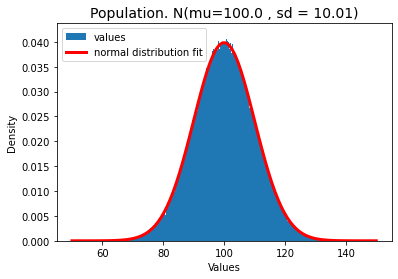

In [87]:
# plot with distribution

plt.hist(population, bins = 1000,density = True, label = 'values')

pdf = stats.norm.pdf(np.linspace(50, 150, 100), population_mean, population_sd)
plt.plot(np.linspace(50, 150, 100), pdf, color = 'red', lw = 3,
         label = 'normal distribution fit')

plt.title('Population. N(mu='+str(round(population_mean,2))+' , sd = '+str(round(population_sd,2))+')', fontsize = 14) 
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend(loc = 'upper left')

plt.show()

#plt.savefig("Population_fit.png", bbox_inches='tight')
#files.download("Population_fit.png") 

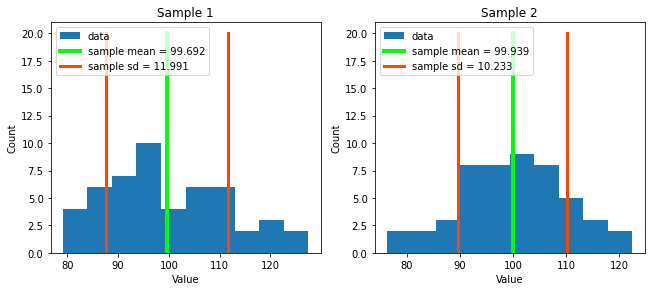

In [89]:
# two samples from population 

population = np.squeeze(population)
sample1 = np.random.choice(population, 50) # with repetition in sample
sample2 = np.random.choice(population, 50, replace = False) # without repetitions 
# or generate random integers and use as indicis

sample1_mean = np.mean(sample1)
sample2_mean = np.mean(sample2)
sample1_sd = np.std(sample1)
sample2_sd = np.std(sample2)

fig, ax, = plt.subplots(1,2)
ax[0].hist( sample1, label = 'data')
ax[1].hist(sample2, label = 'data')

ax[0].plot([sample1_mean, sample1_mean] , [0, 20], color = 'lime', linewidth = 4,
           label = 'sample mean = '+ str(round(sample1_mean,3)))
ax[0].plot([[sample1_mean-sample1_sd, sample1_mean+sample1_sd], [sample1_mean-sample1_sd, sample1_mean+sample1_sd]] , 
           [0, 20], color = 'orangered', linewidth = 3,
           label = 'sample sd = '+ str(round(sample1_sd,3)))

ax[1].plot([sample2_mean, sample2_mean] , [0, 20], color = 'lime',linewidth = 4,
           label = 'sample mean = '+ str(round(sample2_mean,3)))
ax[1].plot(([sample2_mean-sample2_sd, sample2_mean+sample2_sd], [sample2_mean-sample2_sd, sample2_mean+sample2_sd]) , 
           [0, 20], color = 'orangered', linewidth = 3,
           label = 'sample sd = '+ str(round(sample2_sd,3)))

ax[0].set_title('Sample 1')
ax[1].set_title('Sample 2')

ax[0].set_xlabel('Value')
ax[1].set_xlabel('Value')

ax[0].set_ylabel('Count')
ax[1].set_ylabel('Count')

handles0, labels0 = ax[0].get_legend_handles_labels()
handles1, labels1 = ax[1].get_legend_handles_labels()

order = [0,1,2]
ax[0].legend([handles0[idx] for idx in order],[labels0[idx] for idx in order],loc='upper left')
ax[1].legend([handles1[idx] for idx in order],[labels1[idx] for idx in order],loc='upper left')

fig.subplots_adjust(bottom=0.1, right=1.5, top=0.9)
plt.show()

#plt.savefig("Samples2.png", bbox_inches='tight')
#files.download("Samples2.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

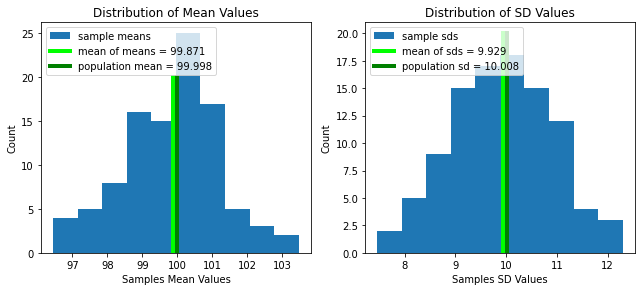

In [90]:
# multiple samples

samplen = np.random.choice(population, size = (50,100))

meann =  np.mean(samplen, axis = 0)
sdn =  np.std(samplen, axis = 0)

mean_of_means = np.mean(meann)
mean_of_sds = np.mean(sdn)

fig, ax, = plt.subplots(1,2)
ax[0].hist( meann, label = 'sample means')
ax[1].hist(sdn,  label = 'sample sds')

ax[0].plot([mean_of_means, mean_of_means] , [0, 20], color = 'lime', linewidth = 4,
           label = 'mean of means = '+ str(round(mean_of_means,3)))
ax[0].plot([population_mean , population_mean] , 
           [0, 20], color = 'green', linewidth = 4,
           label = 'population mean = '+ str(round(population_mean,3)))

ax[1].plot([mean_of_sds, mean_of_sds] , [0, 20], color = 'lime',linewidth = 4,
           label = 'mean of sds = '+ str(round(mean_of_sds,3)))
ax[1].plot([population_sd, population_sd] , 
           [0, 20], color = 'green', linewidth = 4,
           label = 'population sd = '+ str(round(population_sd,3)))

ax[0].set_title('Distribution of Mean Values')
ax[1].set_title('Distribution of SD Values')
ax[0].set_xlabel('Samples Mean Values')
ax[1].set_xlabel('Samples SD Values')
ax[0].set_ylabel('Count')
ax[1].set_ylabel('Count')

handles0, labels0 = ax[0].get_legend_handles_labels()
handles1, labels1 = ax[1].get_legend_handles_labels()

order = [0,1,2]
ax[0].legend([handles0[idx] for idx in order],[labels0[idx] for idx in order],loc='upper left')
ax[1].legend([handles1[idx] for idx in order],[labels1[idx] for idx in order],loc='upper left')

fig.subplots_adjust(bottom=0.1, right=1.5, top=0.9)
plt.show()

#plt.savefig("Samples100.png", bbox_inches='tight')
#files.download("Samples100.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

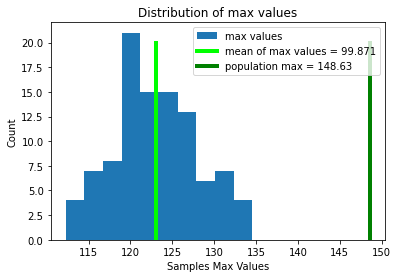

In [91]:
# maximum example
population_max = np.max(population)

maxn =  np.max(samplen, axis = 0)

mean_of_max = np.mean(maxn)

plt.hist(maxn, label = 'max values')

plt.plot([mean_of_max, mean_of_max] , [0, 20], color = 'lime', linewidth = 4,
           label = 'mean of max values = '+ str(round(mean_of_means,3)))
plt.plot([population_max , population_max] , 
           [0, 20], color = 'green', linewidth = 4,
           label = 'population max = '+ str(round(population_max,3)))

plt.title('Distribution of max values')
plt.xlabel('Samples Max Values')
plt.ylabel('Count')
plt.legend(loc = 'upper right')

plt.show()

#plt.savefig("Samples100max.png", bbox_inches='tight')
#files.download("Samples100max.png") 

In [110]:
# upload and read from PC/Drive
# after running press 'Choose File' 
from google.colab import files # upload and save files

uploaded = files.upload()

data = pd.read_csv(io.BytesIO(uploaded['Davis.csv']))

for col in data.columns: # see names of the columns in a loop
    print(col)

print(data) 

Saving Davis.csv to Davis (1).csv
subject
sex
weight
height
repwt
repht
     subject sex  weight  height  repwt  repht
0          1   M      77     182   77.0  180.0
1          2   F      58     161   51.0  159.0
2          3   F      53     161   54.0  158.0
3          4   M      68     177   70.0  175.0
4          5   F      59     157   59.0  155.0
..       ...  ..     ...     ...    ...    ...
195      196   M      74     175   71.0  175.0
196      197   M      83     180   80.0  180.0
197      198   M      81     175    NaN    NaN
198      199   M      90     181   91.0  178.0
199      200   M      79     177   81.0  178.0

[200 rows x 6 columns]


In [2]:
# upload via url from GiHub

url = 'https://raw.githubusercontent.com/opherdonchin/StatisticalComputationAndAnalysis/main/Data/Davis.csv'
data = pd.read_csv(url)

for col in data.columns:
    print(col)

print(data)

subject
sex
weight
height
repwt
repht
     subject sex  weight  height  repwt  repht
0          1   M      77     182   77.0  180.0
1          2   F      58     161   51.0  159.0
2          3   F      53     161   54.0  158.0
3          4   M      68     177   70.0  175.0
4          5   F      59     157   59.0  155.0
..       ...  ..     ...     ...    ...    ...
195      196   M      74     175   71.0  175.0
196      197   M      83     180   80.0  180.0
197      198   M      81     175    NaN    NaN
198      199   M      90     181   91.0  178.0
199      200   M      79     177   81.0  178.0

[200 rows x 6 columns]


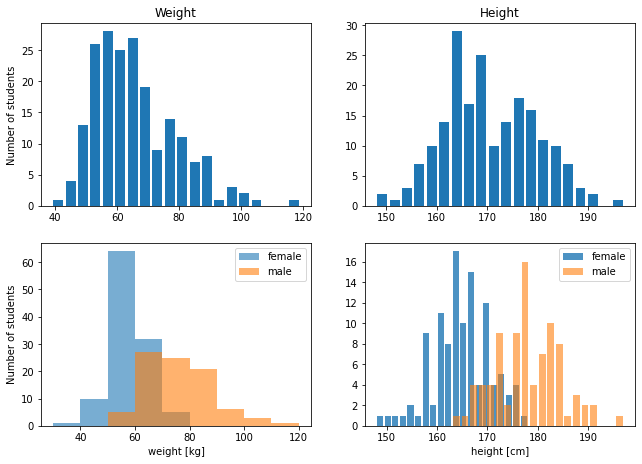

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [116]:
# plot data

# sum(data.sex == 'M')
# sum(data.sex == 'F')

weight = data.weight
height = data.height
num_bins, bin_width = 20, 0.8

fig , ax = plt.subplots(2, 2)
ax[0,0].hist(weight, bins = num_bins, rwidth = bin_width)
ax[0,1].hist(height, bins = num_bins, rwidth = bin_width)

ax[0,0].set_title('Weight')
ax[0,1].set_title('Height')

ax[0,0].set_ylabel('Number of students')


weight_f = data.weight[data.sex == 'F']
weight_m = data.weight[data.sex == 'M']

height_f = height[data.sex == 'F']
height_m = height[data.sex == 'M']

bin_edges = np.arange(30,130,10)
alpha, histtype = 0.6, 'stepfilled'

ax[1,0].hist(weight_f, bins = bin_edges, rwidth = bin_width, label = 'female', alpha = alpha, histtype=histtype)
ax[1,1].hist(height_f, bins = 20, rwidth = 0.8, label = 'female', alpha = 0.8)
ax[1,0].hist(weight_m, bins = bin_edges, rwidth = bin_width, label = 'male', alpha = alpha, histtype=histtype)
ax[1,1].hist(height_m, bins = 20, rwidth = 0.8, label = 'male', alpha = 0.6)

ax[1,0].set_xlabel('weight [kg]')
ax[1,1].set_xlabel('height [cm]')

ax[1,0].set_ylabel('Number of students')

ax[1,0].legend(loc='upper right')
ax[1,1].legend(loc='upper right')

plt.subplots_adjust(bottom=0.1, right=1.5, top=1.5)

plt.show()

#plt.savefig("height_weight.png", bbox_inches='tight')
#files.download("height_weight.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

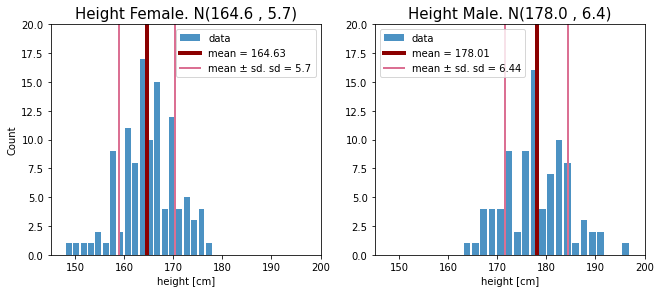

In [121]:
# height data + mean + sd

height_f_mean = height_f.mean()
height_m_mean = height_m.mean()

height_f_sd = height_f.std()
height_m_sd = height_m.std()

bin_num, bin_width, label_data, transp = 20, 0.8, 'data', 0.8

range_y, range_x, mean_c, mean_lw = [0, 20],[145, 200],'darkred', 4
sd_c, sd_lw, fs = 'palevioletred', 2, 15

fig , ax = plt.subplots(1, 2)
ax[0].hist(height_f, bins = bin_num, rwidth = bin_width, label = label_data, alpha = transp)
ax[1].hist(height_m, bins = bin_num, rwidth = bin_width, label = label_data, alpha = transp)

ax[0].plot( [height_f_mean, height_f_mean] , range_y, color = mean_c, linewidth = mean_lw, 
           label = 'mean = '+ str(round(height_f_mean,2)))
ax[1].plot( [height_m_mean, height_m_mean] , range_y, color = mean_c, linewidth = mean_lw, 
           label = 'mean = '+ str(round(height_m_mean,2)))

ax[0].plot( [height_f_mean-height_f_sd, height_f_mean-height_f_sd] , range_y, color = sd_c, 
           linewidth = sd_lw, label = 'mean \u00B1 sd. sd = '+ str(round(height_f_sd,2)))
ax[1].plot( [height_m_mean-height_m_sd, height_m_mean-height_m_sd] , range_y, color = sd_c, 
           linewidth = sd_lw, label = 'mean \u00B1 sd. sd = '+ str(round(height_m_sd,2)))

ax[0].plot( [height_f_mean+height_f_sd, height_f_mean+height_f_sd] ,range_y, color = sd_c, 
           linewidth = sd_lw)
ax[1].plot( [height_m_mean+height_m_sd, height_m_mean+height_m_sd] , range_y, color = sd_c, 
           linewidth = sd_lw)

ax[0].set_ylim(range_y)
ax[1].set_ylim(range_y)
ax[0].set_xlim(range_x)
ax[1].set_xlim(range_x)

ax[0].set_ylabel('Count')
ax[0].set_xlabel('height [cm]')
ax[1].set_xlabel('height [cm]')
ax[0].set_title('Height Female. N('+str(round(height_f_mean,1))+' , '+str(round(height_f_sd,1))+')', fontsize = fs)
ax[1].set_title('Height Male. N('+str(round(height_m_mean,1))+' , '+str(round(height_m_sd,1))+')', fontsize = fs)

order = [0,1,2]
handles0, labels0 = ax[0].get_legend_handles_labels()
handles1, labels1 = ax[1].get_legend_handles_labels()

ax[0].legend([handles0[idx] for idx in order],[labels0[idx] for idx in order],loc='upper right')
ax[1].legend([handles1[idx] for idx in order],[labels1[idx] for idx in order],loc='upper left')

plt.subplots_adjust(bottom=0.1, right=1.5, top=0.9)
plt.show()

#plt.savefig("height_separate.png", bbox_inches='tight')
#files.download("height_separate.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

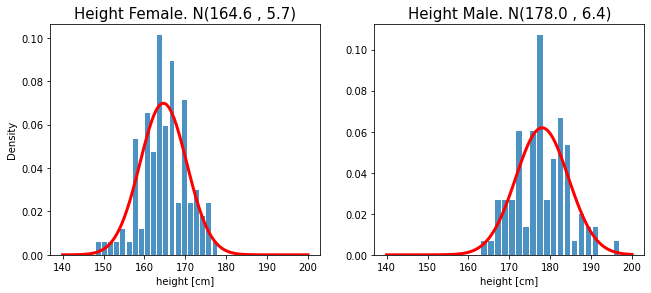

In [124]:
# plot histogram + fit

fig , ax = plt.subplots(1, 2)
ax[0].hist(height_f, bins = bin_num, rwidth = bin_width, alpha = transp, density = True)
ax[1].hist(height_m, bins = bin_num, rwidth = bin_width, alpha = transp, density = True)

pdf_f = stats.norm.pdf(np.linspace(140, 200, 100), height_f_mean, height_f_sd)
ax[0].plot(np.linspace(140, 200, 100), pdf_f, color = 'red', lw = 3)

pdf_m = stats.norm.pdf(np.linspace(140, 200, 100), height_m_mean, height_m_sd)
ax[1].plot(np.linspace(140, 200, 100), pdf_m, color = 'red', lw = 3)

ax[0].set_ylabel('Density')
ax[0].set_xlabel('height [cm]')
ax[1].set_xlabel('height [cm]')
ax[0].set_title('Height Female. N('+str(round(height_f_mean,1))+' , '+str(round(height_f_sd,1))+')', fontsize = fs)
ax[1].set_title('Height Male. N('+str(round(height_m_mean,1))+' , '+str(round(height_m_sd,1))+')', fontsize = fs)

plt.subplots_adjust(bottom=0.1, right=1.5, top=0.9)
plt.show()

#plt.savefig("height_fit.png", bbox_inches='tight')
#files.download("height_fit.png") 


In [3]:
# example - neuron activity (number of spikes per second)

url = 'https://raw.githubusercontent.com/opherdonchin/StatisticalComputationAndAnalysis/main/Data/numSpikes.csv'
data = pd.read_csv(url)

print(data)

#data.shape

     numSpikes
0            1
1            1
2            0
3            3
4            1
..         ...
115          1
116          2
117          3
118          7
119          0

[120 rows x 1 columns]


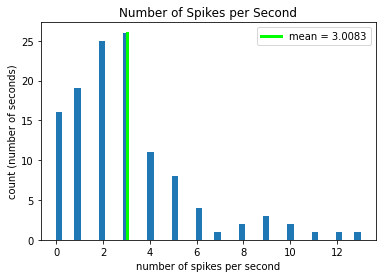

In [4]:
# histogram

numSpikes = data.numSpikes

plt.hist(numSpikes, bins = 50)
plt.title('Number of Spikes per Second')
plt.xlabel('number of spikes per second')
plt.ylabel('count (number of seconds)')
plt.plot([np.mean(numSpikes), np.mean(numSpikes)], [0, 26], color = 'lime', linewidth = 3, 
         label = 'mean = %.4f' % (np.mean(numSpikes)))
plt.legend(loc = 'upper right')

plt.show()
#plt.savefig("spikes_hist.png", bbox_inches='tight')
#files.download("spikes_hist.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

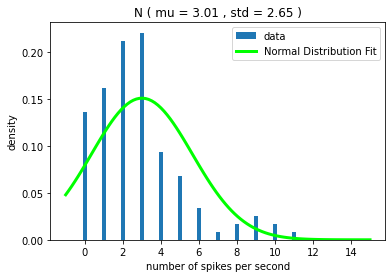

In [5]:

mu, std = stats.norm.fit(numSpikes)

plt.hist(numSpikes, bins=np.arange(13)-0.5, rwidth = 0.2, density = True, label = 'data')

x = np.linspace(-1, 15, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'lime', linewidth=3, label = 'Normal Distribution Fit')
title = "N ( mu = %.2f , std = %.2f )" % (mu, std)
plt.title(title)
plt.xlabel('number of spikes per second')
plt.ylabel('density')
plt.legend(loc = 'upper right')

plt.show()
#plt.savefig("spikes_fitnorm.png", bbox_inches='tight')
#files.download("spikes_fitnorm.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

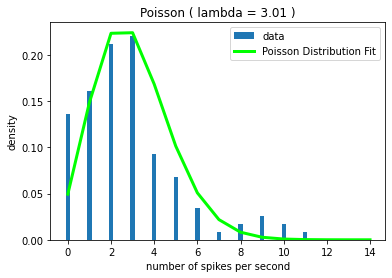

In [6]:
lamda = np.mean(numSpikes)

plt.hist(numSpikes, bins=np.arange(13)-0.5, rwidth = 0.2, density = True, label = 'data')

x = np.arange(0, 15, 1)
p = stats.poisson.pmf(x, lamda)
plt.plot(x, p, 'lime', linewidth=3, label = 'Poisson Distribution Fit')
title = "Poisson ( lambda = %.2f )" % (lamda)
plt.title(title)
plt.xlabel('number of spikes per second')
plt.ylabel('density')
plt.legend(loc = 'upper right')

plt.show()
#plt.savefig("spikes_fitpois.png", bbox_inches='tight')
#files.download("spikes_fitpois.png") 